In [1]:
!pip install --upgrade pip
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

!pip install geopy
from geopy.geocoders import Nominatim 

import json 


# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # map rendering library
import folium 

print('libraries imported')

     |████████████████████████████████| 1.5 MB 10.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
     |████████████████████████████████| 93 kB 2.1 MB/s  eta 0:00:01
libraries imported


In [6]:

body = client_fe418d608c3e4a979d2c1803b5912fef.get_object(Bucket='notebookwithjupyter-donotdelete-pr-ztwx8zka3s2lpg',Key='torontoLatLng.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto = pd.read_csv(body)
toronto.drop('postal_code',axis=1, inplace= True)
toronto.rename(columns={'borough':'Borough','neighborhood':'Neighborhood'},inplace=True)
toronto.head()
toronto.head()


,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [4]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
toronto.describe(include='all')

,Borough,Neighborhood,Latitude,Longitude
count,103,103,103.000000,103.000000
unique,10,99,NaN,NaN
top,North York,Downsview,NaN,NaN
freq,24,4,NaN,NaN
mean,NaN,NaN,43.704608,-79.397153
std,NaN,NaN,0.052463,0.097146
min,NaN,NaN,43.602414,-79.615819
25%,NaN,NaN,43.660567,-79.464763
50%,NaN,NaN,43.696948,-79.388790
75%,NaN,NaN,43.745320,-79.340923


In [8]:
# From the describtion table above we notice there are 4 duplicated neighborhoods 
toronto.drop_duplicates(subset=['Neighborhood'],inplace=True,ignore_index=True)
toronto.describe(include='all')

,Borough,Neighborhood,Latitude,Longitude
count,99,99,99.000000,99.000000
unique,10,99,NaN,NaN
top,North York,"High Park, The Junction South",NaN,NaN
freq,20,1,NaN,NaN
mean,NaN,NaN,43.703228,-79.394366
std,NaN,NaN,0.052982,0.096974
min,NaN,NaN,43.602414,-79.615819
25%,NaN,NaN,43.658739,-79.454919
50%,NaN,NaN,43.695344,-79.388790
75%,NaN,NaN,43.745320,-79.339515


In [9]:
print('Toronto has {} Neigborhood.'.format(len(toronto['Neighborhood'])))
print('Toronto has {} Borough.'.format(len(toronto['Borough'].unique())))
print('They are {}.'.format(toronto['Borough'].unique()))

Toronto has 99 Neigborhood.
Toronto has 10 Borough.
They are ['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga'].


In [10]:
nyc.describe(include='all')

,Borough,Neighborhood,Latitude,Longitude
count,306,306,306.000000,306.000000
unique,5,302,NaN,NaN
top,Queens,Bay Terrace,NaN,NaN
freq,81,2,NaN,NaN
mean,NaN,NaN,40.701362,-73.946254
std,NaN,NaN,0.097498,0.121202
min,NaN,NaN,40.505334,-74.246569
25%,NaN,NaN,40.617778,-74.000062
50%,NaN,NaN,40.702969,-73.932009
75%,NaN,NaN,40.766645,-73.857525


In [11]:
# Again Here there are 4 repeated negihborhoods
nyc.drop_duplicates(subset=['Neighborhood'],inplace=True,ignore_index=True)

In [12]:
nyc.describe(include='all')

,Borough,Neighborhood,Latitude,Longitude
count,302,302,302.000000,302.000000
unique,5,302,NaN,NaN
top,Queens,Williamsbridge,NaN,NaN
freq,80,1,NaN,NaN
mean,NaN,NaN,40.702289,-73.944752
std,NaN,NaN,0.097377,0.120115
min,NaN,NaN,40.505334,-74.246569
25%,NaN,NaN,40.619200,-73.998705
50%,NaN,NaN,40.703229,-73.931460
75%,NaN,NaN,40.767796,-73.857525


In [13]:
print('New York City has {} Neigborhood.'.format(len(nyc['Neighborhood'])))
print('New York City has {} Borough.'.format(len(nyc['Borough'].unique())))
print('They are {}.'.format(nyc['Borough'].unique()))

New York City has 302 Neigborhood.
New York City has 5 Borough.
They are ['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island'].


Rendring:

In [14]:
# importing Toronto City's coordinates from geopy library
toronto_add = 'Toronto,ON, CANADA'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(toronto_add)
t_latitude = location.latitude
t_longitude = location.longitude
print('The geograpical Toronto City are {}, {}.'.format(t_latitude, t_longitude))

The geograpical Toronto City are 43.6534817, -79.3839347.


In [15]:
# Rendring Toronto using folium
toronto_map = folium.Map(location=[t_latitude, t_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto['Latitude'], toronto['Longitude'], 'Borough: '+toronto['Borough']+' Neighborhood/s: '+toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
toronto_map

In [16]:
# importing NewYork City's coordinates from geopy library
nyc_add = 'NYC, USA'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(nyc_add)
nyc_latitude = location.latitude
nyc_longitude = location.longitude
print('The geograpical NewYork City are {}, {}.'.format(nyc_latitude, nyc_longitude))

The geograpical NewYork City are 40.7127281, -74.0060152.


In [17]:
# Rendring NYC using folium
nyc_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nyc['Latitude'], nyc['Longitude'], 'Borough: '+nyc['Borough']+' Neighborhood/s: '+nyc['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_map)  
nyc_map

# Analysis and reform data using FourSquare API

In the following cell input I defined my Foursquare Api credetional, so I apologize for hiding it

In [110]:
# The code was removed by Watson Studio for sharing.

In [19]:
# Below, we defined a function calls to FourSqaure API service and submits neighborhoods names and coordinates >>>
# >>> then returns a dataframe involves Venues and Venue Categories

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print('Ok')
    return(nearby_venues)

In [23]:
import requests # library to handle requests
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Ok


In [24]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [25]:
toronto_venues.describe(include='all')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,2108,2108.000000,2108.000000,2108,2108.000000,2108.000000,2108
unique,96,NaN,NaN,1382,NaN,NaN,271
top,"Commerce Court, Victoria Hotel",NaN,NaN,Starbucks,NaN,NaN,Coffee Shop
freq,100,NaN,NaN,61,NaN,NaN,188
mean,NaN,43.673068,-79.387997,NaN,43.673151,-79.387937,NaN
std,NaN,0.041647,0.053330,NaN,0.041483,0.053404,NaN
min,NaN,43.602414,-79.615819,NaN,43.599152,-79.621765,NaN
25%,NaN,43.648198,-79.400049,NaN,43.648501,-79.399418,NaN
50%,NaN,43.657162,-79.381752,NaN,43.655146,-79.381508,NaN
75%,NaN,43.679557,-79.374846,NaN,43.677785,-79.372220,NaN


In [26]:
print('The approximate number of venues in Toronto City is:{}'.format(toronto_venues.shape[0]))
# Approximation is displayed because FourSquae API limits displaying venues in each venue to 100
tor_v=toronto_venues.copy()

The approximate number of venues in Toronto City is:2108


In [27]:
# As we've said before, there is 99 Neiborhood in Toronto but, there are 96 Neighborhood that has venues
# ie, there are 3 Neighborhoods have no Venues we will discover them:
a=tor_v['Neighborhood'].unique()
b=toronto['Neighborhood'].unique()

# The following loop script looks for values are not subset of two sets
def loop_to_check(e,f):
    c=[]
    for i in range(len(e)):
        if e[i] not in f:
            c.append(e[i])
    return c
t_noven=loop_to_check(b,a)
print('The Neighborhoods has no Venues are: {}'.format(t_noven))

The Neighborhoods has no Venues are: ['Islington Avenue, Humber Valley Village', 'Willowdale, Newtonbrook', 'Upper Rouge']


In [28]:
## Here I will Visualize the Neighborhoods who don't have Venues
tor_outliers= toronto.loc[(toronto.Neighborhood=='Islington Avenue, Humber Valley Village') | (toronto.Neighborhood=='Willowdale, Newtonbrook') | (toronto.Neighborhood=='Upper Rouge') ]
tor_outliers.reset_index(inplace=True)
tor_outliers.drop(columns='index',inplace=True)
tor_outliers

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Neighborhood,Latitude,Longitude
0,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
1,North York,"Willowdale, Newtonbrook",43.789053,-79.408493
2,Scarborough,Upper Rouge,43.836125,-79.205636


In [29]:
# Rendring Toronto No Venue Neighborhoods using folium
toronto_out = folium.Map(location=[t_latitude, t_longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(tor_outliers['Latitude'], tor_outliers['Longitude'], 'Borough: '+tor_outliers['Borough']+' Neighborhood/s: '+tor_outliers['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_out)  
toronto_out

#### We Notice above that the empty Neighborhoods are far away from Toronto Center

In [30]:
#Top 10 Neighborhoods have the most Venues
topTn=pd.DataFrame(tor_v.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False).head(10))
topTn.reset_index(inplace=True)
topTn.rename(columns={'Neighborhood':'Top 10 Toronto Neighborhoods have Venues','Venue':'Number of Venues'},inplace=True)
topTn.index = np.arange(1, len(topTn) + 1)
topTn

,Top 10 Toronto Neighborhoods have Venues,Number of Venues
1,"Toronto Dominion Centre, Design Exchange",100
2,"Commerce Court, Victoria Hotel",100
3,"Garden District, Ryerson",100
4,"First Canadian Place, Underground city",100
5,"Harbourfront East, Union Station, Toronto Islands",100
6,"Richmond, Adelaide, King",100
7,Stn A PO Boxes,96
8,St. James Town,85
9,Church and Wellesley,75
10,"Kensington Market, Chinatown, Grange Park",74


#### Now We will render the most Neighborhoods with Venues

In [31]:
most_TN = pd.merge(topTn, toronto,how='left',left_on='Top 10 Toronto Neighborhoods have Venues',right_on='Neighborhood')
most_TN =most_TN[0:10]
most_TN.drop(columns='Neighborhood',inplace=True)
most_TN

,Top 10 Toronto Neighborhoods have Venues,Number of Venues,Borough,Latitude,Longitude
0,"Toronto Dominion Centre, Design Exchange",100,Downtown Toronto,43.647177,-79.381576
1,"Commerce Court, Victoria Hotel",100,Downtown Toronto,43.648198,-79.379817
2,"Garden District, Ryerson",100,Downtown Toronto,43.657162,-79.378937
3,"First Canadian Place, Underground city",100,Downtown Toronto,43.648429,-79.382280
4,"Harbourfront East, Union Station, Toronto Islands",100,Downtown Toronto,43.640816,-79.381752
5,"Richmond, Adelaide, King",100,Downtown Toronto,43.650571,-79.384568
6,Stn A PO Boxes,96,Downtown Toronto,43.646435,-79.374846
7,St. James Town,85,Downtown Toronto,43.651494,-79.375418
8,Church and Wellesley,75,Downtown Toronto,43.665860,-79.383160
9,"Kensington Market, Chinatown, Grange Park",74,Downtown Toronto,43.653206,-79.400049


In [32]:
toronto_most = folium.Map(location=[t_latitude, t_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(most_TN['Latitude'], most_TN['Longitude'], 'Borough: '+most_TN['Borough']+' Neighborhood/s: '+most_TN['Top 10 Toronto Neighborhoods have Venues']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_most)  
toronto_most

In [28]:
print('There is {} unique venue category in Toronto.'.format(len(tor_v['Venue Category'].unique())))

There is 271 unique venue category in Toronto.


In [33]:
top20t=pd.DataFrame(tor_v['Venue Category'].value_counts().head(20))
top20t.reset_index(inplace=True)
top20t.rename(columns={'index':'Top 20 Toronto Venue Category','Venue Category':'Counts'},inplace=True)
 # I want the order starts from 1 so I wrote the below script
top20t.index = np.arange(1, len(top20t) + 1)
top20t

,Top 20 Toronto Venue Category,Counts
1,Coffee Shop,188
2,Café,93
3,Restaurant,66
4,Park,50
5,Pizza Place,49
6,Hotel,44
7,Sandwich Place,42
8,Bakery,41
9,Japanese Restaurant,40
10,Italian Restaurant,40


In [34]:
# Displaying the appearnce of top 5 venues (trading mark chains or brands) to Neiborhoods
topTv=pd.DataFrame(tor_v['Venue'].value_counts().head(5))
topTv.reset_index(inplace=True)
topTv.rename(columns={'index':'Venue Name in Toronto','Venue':'Number of Branches'},inplace=True)
topTv.index = np.arange(1, len(topTv) + 1)
topTv

,Venue Name in Toronto,Number of Branches
1,Starbucks,61
2,Tim Hortons,39
3,Subway,28
4,Shoppers Drug Mart,17
5,LCBO,14


A New call for New York City Venues and Categories:

In [35]:
nyc_venues = getNearbyVenues(names=nyc['Neighborhood'],
                                   latitudes=nyc['Latitude'],
                                   longitudes=nyc['Longitude']
                                  )

Ok


In [40]:
nyc_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [41]:
nyc_venues.describe(include='all')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,9995,9995.000000,9995.000000,9995,9995.000000,9995.000000,9995
unique,302,NaN,NaN,7775,NaN,NaN,427
top,Chelsea,NaN,NaN,Dunkin',NaN,NaN,Pizza Place
freq,100,NaN,NaN,148,NaN,NaN,436
mean,NaN,40.723336,-73.948373,NaN,40.723343,-73.948304,NaN
std,NaN,0.078997,0.086785,NaN,0.078830,0.086865,NaN
min,NaN,40.505334,-74.246569,NaN,40.504368,-74.248892,NaN
25%,NaN,40.678570,-73.994279,NaN,40.678964,-73.992941,NaN
50%,NaN,40.725427,-73.958860,NaN,40.725732,-73.959808,NaN
75%,NaN,40.768113,-73.901842,NaN,40.766107,-73.900597,NaN


In [42]:
print('The approximate number of venues in New York City is: {} Venue'.format(nyc_venues.shape[0]))
nyc_v=nyc_venues.copy()

The approximate number of venues in New York City is: 9995 Venue


In [43]:
print('New York City has {} Neighborhood.'.format(len(nyc['Neighborhood'])))
print('New York City has {} Borough.'.format(len(nyc['Borough'].unique())))
print('The situation in New York City is different than Toronto,Canada. In New York, all its neighborhoods have venues')

New York City has 302 Neighborhood.
New York City has 5 Borough.
The situation in New York City is different than Toronto,Canada. In New York, all its neighborhoods have venues


In [44]:
#Top 10 Neighborhoods have the most Venues
topNn=pd.DataFrame(nyc_v.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False).head(10))
topNn.reset_index(inplace=True)
topNn.rename(columns={'Neighborhood':'Top 10 NYC Neighborhoods have Venues','Venue':'Number of Venues'},inplace=True)
topNn.index = np.arange(1, len(topNn) + 1)
topNn
# We notice below that the top 10 Neighborhoods all have 100 Venues
# And by going deep through iterating, I saw that a 27 Neighborhood has 100 Venue
# Starting from the Neighborhood No. 28 in descinding order, number of venues will equal to 98 in th Neighborhod

,Top 10 NYC Neighborhoods have Venues,Number of Venues
1,Yorkville,100
2,Chelsea,100
3,Chinatown,100
4,Civic Center,100
5,Clinton,100
6,Sutton Place,100
7,Sunnyside Gardens,100
8,Downtown,100
9,South Side,100
10,East Village,100


In [45]:
most_nyc = pd.merge(topNn, nyc,how='left',left_on='Top 10 NYC Neighborhoods have Venues',right_on='Neighborhood')
most_nyc =most_nyc[0:10]
most_nyc.drop(columns='Neighborhood',inplace=True)
most_nyc

,Top 10 NYC Neighborhoods have Venues,Number of Venues,Borough,Latitude,Longitude
0,Yorkville,100,Manhattan,40.775930,-73.947118
1,Chelsea,100,Manhattan,40.744035,-74.003116
2,Chinatown,100,Manhattan,40.715618,-73.994279
3,Civic Center,100,Manhattan,40.715229,-74.005415
4,Clinton,100,Manhattan,40.759101,-73.996119
5,Sutton Place,100,Manhattan,40.760280,-73.963556
6,Sunnyside Gardens,100,Queens,40.745652,-73.918193
7,Downtown,100,Brooklyn,40.690844,-73.983463
8,South Side,100,Brooklyn,40.710861,-73.958001
9,East Village,100,Manhattan,40.727847,-73.982226


We will render the most crowded neighborhoods then we'll notice that they're closed to each other in the Center of New York City

In [46]:
nyc_most = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(most_nyc['Latitude'], most_nyc['Longitude'], 'Borough: '+most_nyc['Borough']+' Neighborhood/s: '+most_nyc['Top 10 NYC Neighborhoods have Venues']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_most)  
nyc_most

In [47]:
print('Three is {} uniqe Venue category in New York City. '.format(len(nyc_venues['Venue Category'].unique())))

Three is 427 uniqe Venue category in New York City. 


# Visualization

In [48]:
# Defining the top 20 Venue Category in NYC
top20nyc= pd.DataFrame(nyc_v['Venue Category'].value_counts().head(20))
top20nyc.reset_index(inplace=True)
top20nyc.rename(columns = {'index':'Top 20 NYC Venue Category','Venue Category':'Counts'},inplace=True)
top20nyc.index = np.arange(1, len(top20nyc) + 1)
top20nyc

,Top 20 NYC Venue Category,Counts
1,Pizza Place,436
2,Italian Restaurant,313
3,Coffee Shop,307
4,Deli / Bodega,271
5,Bar,225
6,Bakery,222
7,Chinese Restaurant,222
8,Grocery Store,196
9,Sandwich Place,185
10,Café,178


In [49]:
# Displaying the appearnce of top 5 venues (trading mark chains or brands) to Neiborhoods
topNv=pd.DataFrame(nyc_v['Venue'].value_counts().head(5))
topNv.reset_index(inplace=True)
topNv.rename(columns={'index':'Venue Name in NYC','Venue':'Number of Branches'},inplace=True)
topNv.index = np.arange(1, len(topNv) + 1)
topNv

,Venue Name in NYC,Number of Branches
1,Dunkin',148
2,Chase Bank,90
3,Subway,66
4,Rite Aid,54
5,Starbucks,45


In [50]:
# Merging top 20 Venue Category in both Cities
topconc = pd.concat([top20t, top20nyc], axis=0,ignore_index=True)
for i in topconc.iloc[20:40]:
    topconc['Top 20 Toronto Venue Category'].update(topconc['Top 20 NYC Venue Category'][20:40])
topconc.drop(columns='Top 20 NYC Venue Category',inplace=True)
topconc['City']='Toronto'
topconc['City'][20:40]='NYC'
topconc.rename(columns={'Top 20 Toronto Venue Category':'Venue Category'},inplace=True)
topconc

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Venue Category,Counts,City
0,Coffee Shop,188,Toronto
1,Café,93,Toronto
2,Restaurant,66,Toronto
3,Park,50,Toronto
4,Pizza Place,49,Toronto
5,Hotel,44,Toronto
6,Sandwich Place,42,Toronto
7,Bakery,41,Toronto
8,Japanese Restaurant,40,Toronto
9,Italian Restaurant,40,Toronto


Text(0.5, 1.0, 'Top 20 Venue Category in Toronto and New York City')

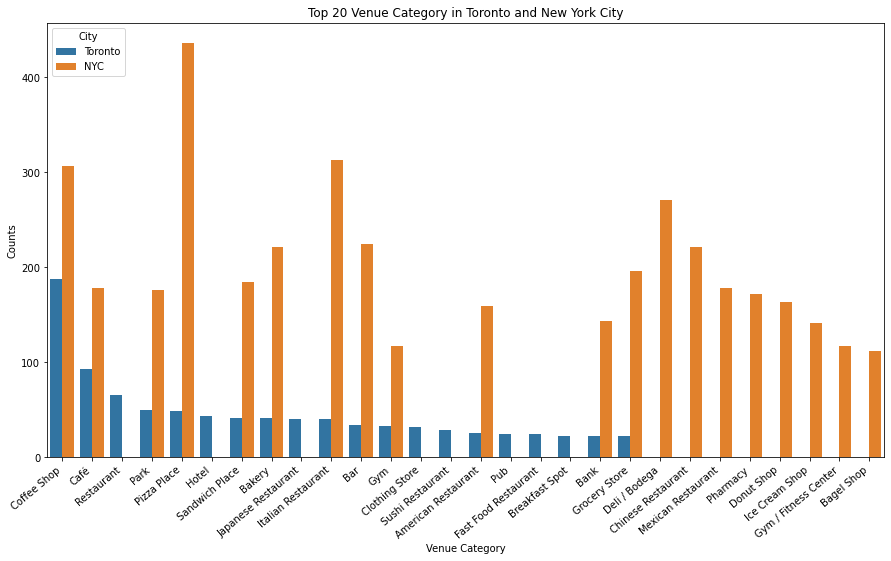

In [51]:

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Venue Category", y="Counts",hue='City', data=topconc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Top 20 Venue Category in Toronto and New York City')

In [52]:
# Merging top 20 Venue Category in both Cities
topbrands = pd.concat([topTv, topNv], axis=0,ignore_index=True)
for i in topbrands.iloc[0:5]:
    topbrands['Venue Name in Toronto'].update(topbrands['Venue Name in NYC'][5:10])
topbrands.drop(columns='Venue Name in NYC',inplace=True)
topbrands['City']='Toronto'
topbrands['City'][5:10]='NYC'
topbrands.rename(columns={'Venue Name in Toronto':'Top 5 Brands'},inplace=True)
topbrands

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Top 5 Brands,Number of Branches,City
0,Starbucks,61,Toronto
1,Tim Hortons,39,Toronto
2,Subway,28,Toronto
3,Shoppers Drug Mart,17,Toronto
4,LCBO,14,Toronto
5,Dunkin',148,NYC
6,Chase Bank,90,NYC
7,Subway,66,NYC
8,Rite Aid,54,NYC
9,Starbucks,45,NYC


Text(0.5, 1.0, 'Top Brands in Toronto and New York City')

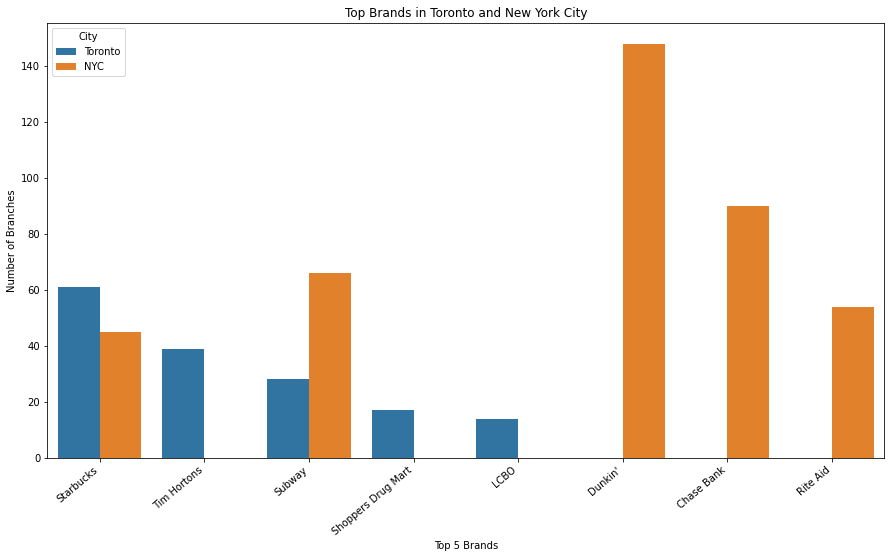

In [53]:
plt.figure(figsize=(15,8))
ax2 = sns.barplot(x="Top 5 Brands", y="Number of Branches",hue='City', data=topbrands)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('Top Brands in Toronto and New York City')

# Machine Learning: We deployed Kmeans Clustering Model

In [54]:
# Creating a new data frame with one hot venue category columns
nyc_onehot = pd.get_dummies(nyc_v[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# adding the values of Neighborhood 
nyc_onehot['Neighborhood']= nyc_v['Neighborhood']
nyc_onehot.shape

(9995, 427)

In [56]:
# Rearrange the order of Neighborhood column to be first:
col_name="Neighborhood"
first_col = nyc_onehot.pop(col_name)
nyc_onehot.insert(0, col_name, first_col)
nyc_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### In This procedure, we will regroup each neighborhood by its 10 most appearnce venues

First, I will work with NYC data

In [57]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Woodhaven,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.040000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
298,Woodlawn,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
299,Woodrow,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
300,Woodside,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.00,0.013333,0.0,0.0,0.0


In [58]:
# This function for regrouping upon user desire for how many most cagteory group >>
# >> He wants to display through manuplating the variableL num_top_venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NYneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
NYneighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    NYneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

NYneighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Spa,Supermarket,Deli / Bodega,Chinese Restaurant,Playground,Fast Food Restaurant,Grocery Store,Check Cashing Service,Fried Chicken Joint
1,Annadale,Pizza Place,American Restaurant,Food,Train Station,Park,Restaurant,Diner,Dance Studio,Deli / Bodega,Farm
2,Arden Heights,Deli / Bodega,Pizza Place,Bus Stop,Coffee Shop,Pharmacy,Dim Sum Restaurant,Factory,Farm,Farmers Market,Fast Food Restaurant
3,Arlington,Deli / Bodega,Coffee Shop,Bus Stop,Home Service,Grocery Store,Boat or Ferry,Flower Shop,Farm,Farmers Market,Fast Food Restaurant
4,Arrochar,Bus Stop,Italian Restaurant,Deli / Bodega,Pharmacy,Hotel,Mediterranean Restaurant,Middle Eastern Restaurant,Outdoors & Recreation,Bagel Shop,Liquor Store


Before going in direct to clustering progress, there's an optimum method called 'silhouette Score' looks for optimal K Value for Clustering
Since Elbow method is not optimum in most of KMeans Clustering cases

In [60]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_score

sil=[]
K_sil=range(2,50)
for k in K_sil:
    print(k, end=' ')
    kmeans= KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    labels=kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering,labels,metric='euclidean'))


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

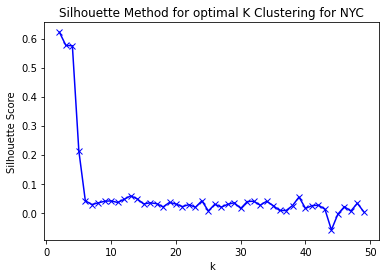

In [61]:
plt.plot(K_sil,sil,'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for optimal K Clustering for NYC')
plt.show()    

Clustering Process:

In [62]:
# set number of clusters
kclusters = 2



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [63]:
# add clustering labels
NYneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = nyc.copy()

# merge NYneighborhoods_venues_sorted with nyc_merged to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(NYneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0,Pharmacy,Donut Shop,Laundromat,Deli / Bodega,Gas Station,Dessert Shop,Sandwich Place,Ice Cream Shop,Fish Market,Fish & Chips Shop
1,Bronx,Co-op City,40.874294,-73.829939,0,Bus Station,Accessories Store,Pizza Place,Grocery Store,Chinese Restaurant,Fast Food Restaurant,Park,Bar,Bagel Shop,Trail
2,Bronx,Eastchester,40.887556,-73.827806,0,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Convenience Store,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Food & Drink Shop,Automotive Shop
3,Bronx,Fieldston,40.895437,-73.905643,0,Medical Supply Store,River,Plaza,Flea Market,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,0,Park,Plaza,Gym,Home Service,Moving Target,Food Truck,Bank,Bus Station,Playground,Fast Food Restaurant


NYC cluster rendering

In [64]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
NYmap_clusters = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(NYmap_clusters)
       
NYmap_clusters

#### Cluster 0 NYC

In [65]:
cluster0NY=nyc_merged.loc[nyc_merged['Cluster Labels'] == 0]
cluster0NY=pd.DataFrame(cluster0NY['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster0NY

,1st Most Common Venue
Deli / Bodega,27


#### Cluster 1 NYC

In [66]:
cluster1NY=nyc_merged.loc[nyc_merged['Cluster Labels'] == 1]
cluster1NY=pd.DataFrame(cluster1NY['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster1NY

,1st Most Common Venue
Park,3


Now comes Toronto Clustering turn, and we follow the same path to find the optimum K Value

In [67]:
tor_onehot = pd.get_dummies(tor_v[['Venue Category']], prefix="", prefix_sep="")
tor_onehot['Neighborhood']= tor_v['Neighborhood']

# Rearrange the order of Neighborhood column to be first:
col_name="Neighborhood"
first_col = tor_onehot.pop(col_name)
tor_onehot.insert(0, col_name, first_col)

# Normalizing:
tor_grouped = tor_onehot.groupby('Neighborhood').mean().reset_index()

# Sorting and grouping:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Tneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Tneighborhoods_venues_sorted['Neighborhood'] = tor_grouped['Neighborhood']

for ind in np.arange(tor_grouped.shape[0]):
    Tneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

Tneighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Clothing Store,Event Space,Falafel Restaurant,Ethiopian Restaurant,Escape Room,Discount Store
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Coffee Shop,Pub,Pharmacy,Gym,Greek Restaurant,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Fried Chicken Joint,Diner,Supermarket,Restaurant,Sushi Restaurant,Mobile Phone Shop,Frozen Yogurt Shop,Deli / Bodega
3,Bayview Village,Japanese Restaurant,Café,Chinese Restaurant,Bank,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Indian Restaurant,Grocery Store,Pharmacy,Pizza Place,Pub,Restaurant


In [95]:
tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)


sil=[]
K_sil=range(2,50)
for k in K_sil:
    print(k, end=' ')
    kmeans= KMeans(n_clusters=k).fit(tor_grouped_clustering)
    labels=kmeans.labels_
    sil.append(silhouette_score(tor_grouped_clustering,labels,metric='euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

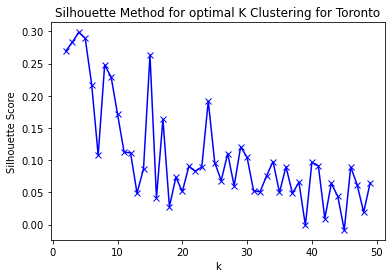

In [96]:
plt.plot(K_sil,sil,'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for optimal K Clustering for Toronto')
plt.show()    

Toronto Clustering:

In [97]:
# set number of clusters
kclusters = 4

tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [98]:
# add clustering labels to grouped neighborhoods table:
Tneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = toronto.copy()

# merge Tneighborhoods_venues_sorted with tor_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(Tneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
tor_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
1,North York,Victoria Village,43.725882,-79.315572,0.0,Pizza Place,Hockey Arena,French Restaurant,Coffee Shop,Portuguese Restaurant,Intersection,Cosmetics Shop,Convenience Store,Event Space,Ethiopian Restaurant
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Beer Store,Brewery,Shoe Store
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Accessories Store,Boutique,Gift Shop,Furniture / Home Store,Event Space,Coffee Shop,Women's Store,Vietnamese Restaurant,Airport Service
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Yoga Studio,Sushi Restaurant,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Café,Restaurant,Chinese Restaurant


In [100]:
# We want to drop the Neigborhoods that don't have att all any venues, you'll notice that>>
# >> most common venue cell are blank
mer_msk=(tor_merged.Neighborhood=='Islington Avenue, Humber Valley Village') | (tor_merged.Neighborhood=='Willowdale, Newtonbrook') | (tor_merged.Neighborhood=='Upper Rouge')
tor_merged.loc[mer_msk]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# I dropped the above unnecessary rows:
tor_merged.drop(index=[5,50,91],inplace=True)

tor_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
1,North York,Victoria Village,43.725882,-79.315572,0.0,Pizza Place,Hockey Arena,French Restaurant,Coffee Shop,Portuguese Restaurant,Intersection,Cosmetics Shop,Convenience Store,Event Space,Ethiopian Restaurant
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Beer Store,Brewery,Shoe Store
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Accessories Store,Boutique,Gift Shop,Furniture / Home Store,Event Space,Coffee Shop,Women's Store,Vietnamese Restaurant,Airport Service
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Yoga Studio,Sushi Restaurant,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Café,Restaurant,Chinese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0.0,River,Pool,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
95,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio
96,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,0.0,Gym / Fitness Center,Garden Center,Comic Shop,Pizza Place,Recording Studio,Restaurant,Butcher,Burrito Place,Skate Park,Brewery
97,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,3.0,Construction & Landscaping,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store


In [102]:
tor_merged.dtypes
# I noticed that the cluster lables are float, in order to avoid issues while rendering >>
# >> I'will convert those lables to int

Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [103]:
tor_merged['Cluster Labels'] = tor_merged['Cluster Labels'].apply(np.int64)
tor_merged.dtypes
# Now it seems good

Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

Rendering Toronto Clusters:

In [104]:
# create map
Tmap_clusters = folium.Map(location=[t_latitude, t_longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Tmap_clusters)
       
Tmap_clusters

#### Cluster 0 Toronto

In [105]:
cluster0=tor_merged.loc[tor_merged['Cluster Labels'] == 0]
cluster0=pd.DataFrame(cluster0['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster0

,1st Most Common Venue
Coffee Shop,22


#### Cluster 1 Toronto

In [106]:
cluster1=tor_merged.loc[tor_merged['Cluster Labels'] == 1]
cluster1=pd.DataFrame(cluster1['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster1

,1st Most Common Venue
Park,7


#### Cluster 2 Toronto

In [107]:
cluster2=tor_merged.loc[tor_merged['Cluster Labels'] == 2]
cluster2=pd.DataFrame(cluster2['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster2

,1st Most Common Venue
Fast Food Restaurant,1


#### Cluster 3 Toronto

In [108]:
cluster3=tor_merged.loc[tor_merged['Cluster Labels'] == 3]
cluster3=pd.DataFrame(cluster3['1st Most Common Venue'].value_counts(ascending=False).head(1))
cluster3

,1st Most Common Venue
Baseball Field,1
